In [1]:
import re
import csv
import string

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/FinalYearProject')

## Analysis raw tweets data

In [4]:
category = ['Label','Text']
train_data = pd.DataFrame(pd.read_csv('./Dataset/train.tsv', sep='\t', quoting=csv.QUOTE_NONE, error_bad_lines=False), columns = category)
valid_data = pd.DataFrame(pd.read_csv('./Dataset/valid.tsv', sep='\t'), columns= category)
test_data = pd.DataFrame(pd.read_csv('./Dataset/test.tsv', sep='\t'), columns = category)
unlabeled_test_with_noise = pd.DataFrame(pd.read_csv('./Dataset/unlabeled_test_with_noise.tsv', sep='\t'), columns=['Text'])

In [5]:
#train_data
#valid_data
#test_data
#unlabeled_test_with_noise

In [6]:
print('Train data infomation:\n')
print(train_data.info())
print('\n')

print('Validation data infomation:\n')
print(valid_data.info())
print('\n')

print('Test data infomation:\n')
print(test_data.info())
print('\n')

print('Unlabeled test with noise infomation:\n')
print(unlabeled_test_with_noise.info())
print('\n')

Train data infomation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   7000 non-null   object
 1   Text    7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB
None


Validation data infomation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1000 non-null   object
 1   Text    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None


Test data infomation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   2000 non-null   object
 1   Text    2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


Unlabeled test with noise info

In [7]:
# Change Label to 1 or 0
train_data['Label'] = train_data['Label'].apply(lambda x : 1 if x == 'INFORMATIVE' else 0)
valid_data['Label'] = valid_data['Label'].apply(lambda x : 1 if x == 'INFORMATIVE' else 0)
test_data['Label'] = test_data['Label'].apply(lambda x : 1 if x == 'INFORMATIVE' else 0)

In [8]:
# Count how many informative and uninformative tweets in the train,valid,test dataset.

def count_informative_and_uninformative_tweets(df):
    informative_count = 0
    uninformative_count = 0

    for label in df['Label']:
        if label == 1:
            informative_count += 1
        else:
            uninformative_count += 1

    return informative_count, uninformative_count

train_informative_count, train_uninformative_count = count_informative_and_uninformative_tweets(train_data)
print('There are {} informative tweets and {} uninformative tweets in the Training Set!'.format(train_informative_count, train_uninformative_count))

valid_informative_count, valid_uninformative_count = count_informative_and_uninformative_tweets(valid_data)
print('There are {} informative tweets and {} uninformative tweets in the Validation Set!'.format(valid_informative_count, valid_uninformative_count))

test_informative_count, test_uninformative_count = count_informative_and_uninformative_tweets(test_data)
print('There are {} informative tweets and {} uninformative tweets in the Testing Set!'.format(test_informative_count, test_uninformative_count))

There are 3303 informative tweets and 3697 uninformative tweets in the Training Set!
There are 472 informative tweets and 528 uninformative tweets in the Validation Set!
There are 944 informative tweets and 1056 uninformative tweets in the Testing Set!


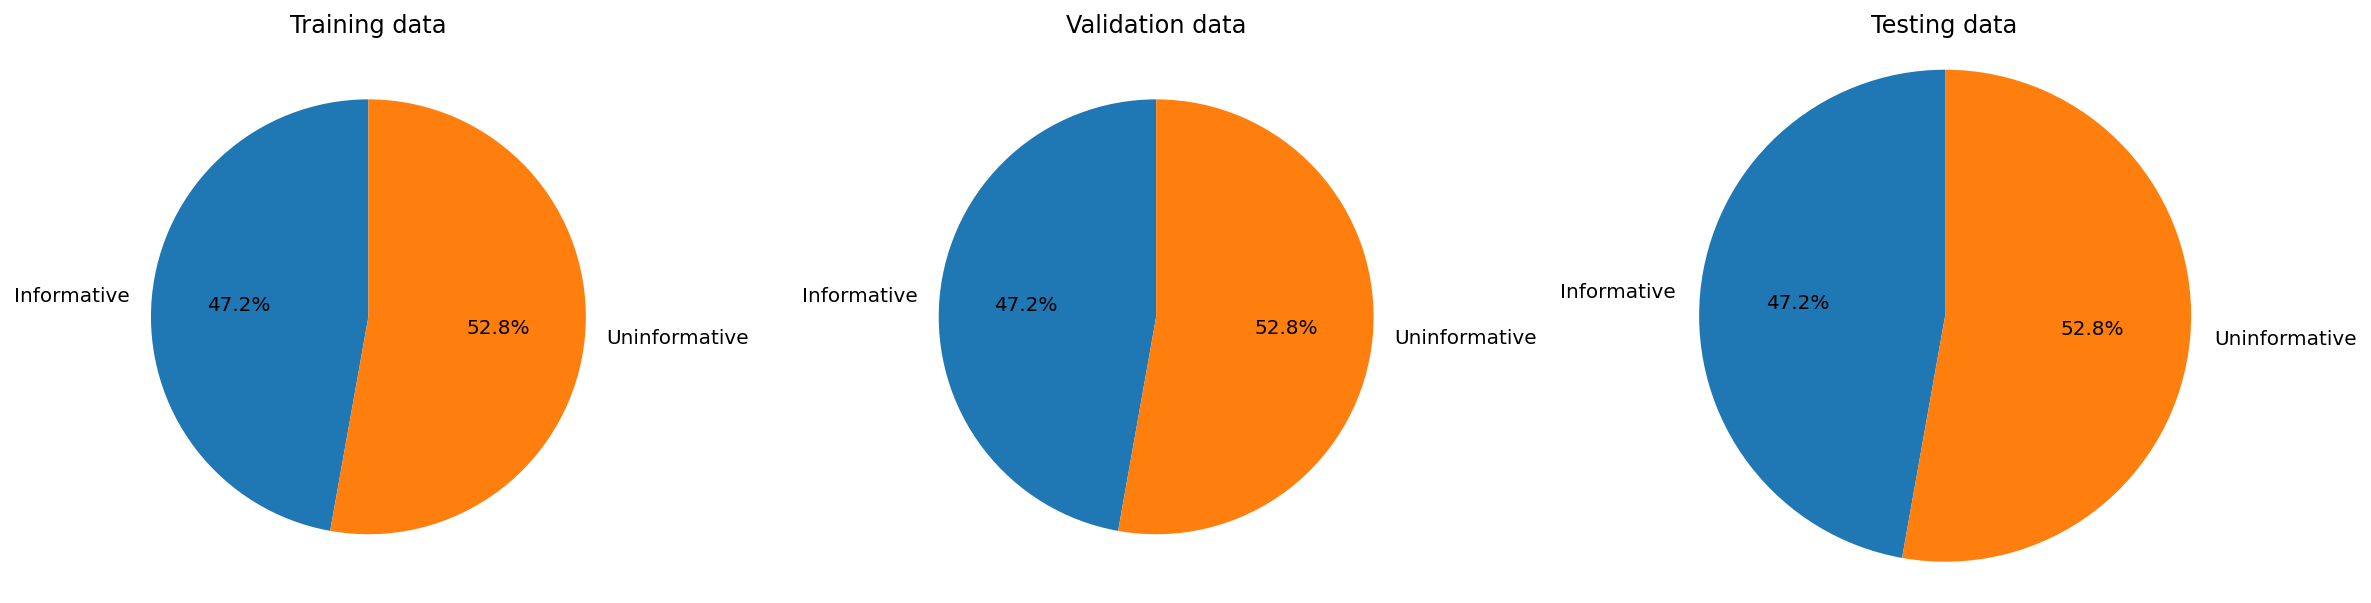

In [9]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(20, 5))

# labels for the two classes
labels = 'Informative', 'Uninformative'

# Sizes for each dataset
sizes_train = [train_informative_count, train_uninformative_count]
sizes_valid = [valid_informative_count, valid_uninformative_count]
sizes_test = [test_informative_count, test_uninformative_count]

# Plot each dataset with pie chart
plt.subplot(1,3,1)
plt.pie(sizes_train, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Training data')

plt.subplot(1,3,2)
plt.pie(sizes_valid, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Validation data')

plt.subplot(1,3,3)
plt.pie(sizes_test, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Testing data')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

In [10]:
all_data_original = pd.concat([train_data,valid_data,test_data], axis=0)
all_data_original

Label                                               Text
0         1  Official death toll from #covid19 in the Unite...
1         1  Dearest Mr. President @USER 1,169 coronavirus ...
2         1  Latest Updates March 20 ⚠️5274 new cases and 3...
3         1  真把公主不当干部 BREAKING: 21 people on Grand Princess...
4         0  OKLAHOMA CITY — The State Department of Educat...
...     ...                                                ...
1995      0  @USER Solution COVID19 1-Contagion: law forcin...
1996      0  The BJP has questioned the credentials of Rama...
1997      1  2 Bondi backpackers have coronavirus. 2 other ...
1998      1  Weird-ass world we live in. Here I am in East ...
1999      1  2 more cases of #Coronavirus in #Rwanda. (19 i...

[10000 rows x 2 columns]

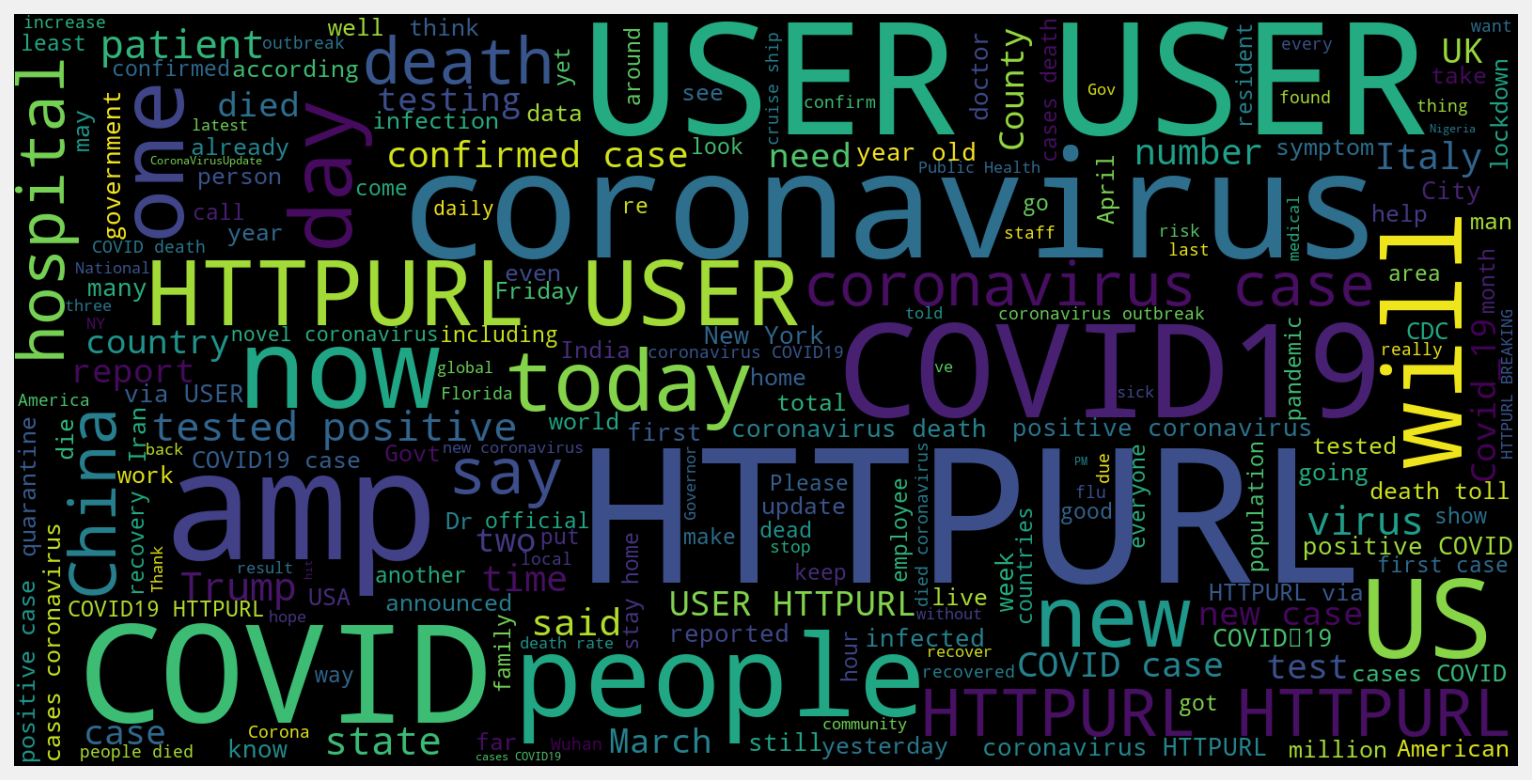

In [11]:
plt.style.use('fivethirtyeight')
unclean_text = all_data_original['Text']
unclean_string = []
for t in unclean_text.values:
    unclean_string.append(t)
unclean_string = pd.Series(unclean_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(unclean_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
train_data['Text_length'] = train_data['Text'].apply(lambda x: len(x) - x.count(" "))
valid_data['Text_length'] = valid_data['Text'].apply(lambda x: len(x) - x.count(" "))
test_data['Text_length'] = test_data['Text'].apply(lambda x: len(x) - x.count(" "))
unlabeled_test_with_noise['Text_length'] = unlabeled_test_with_noise['Text'].apply(lambda x: len(x) - x.count(" "))

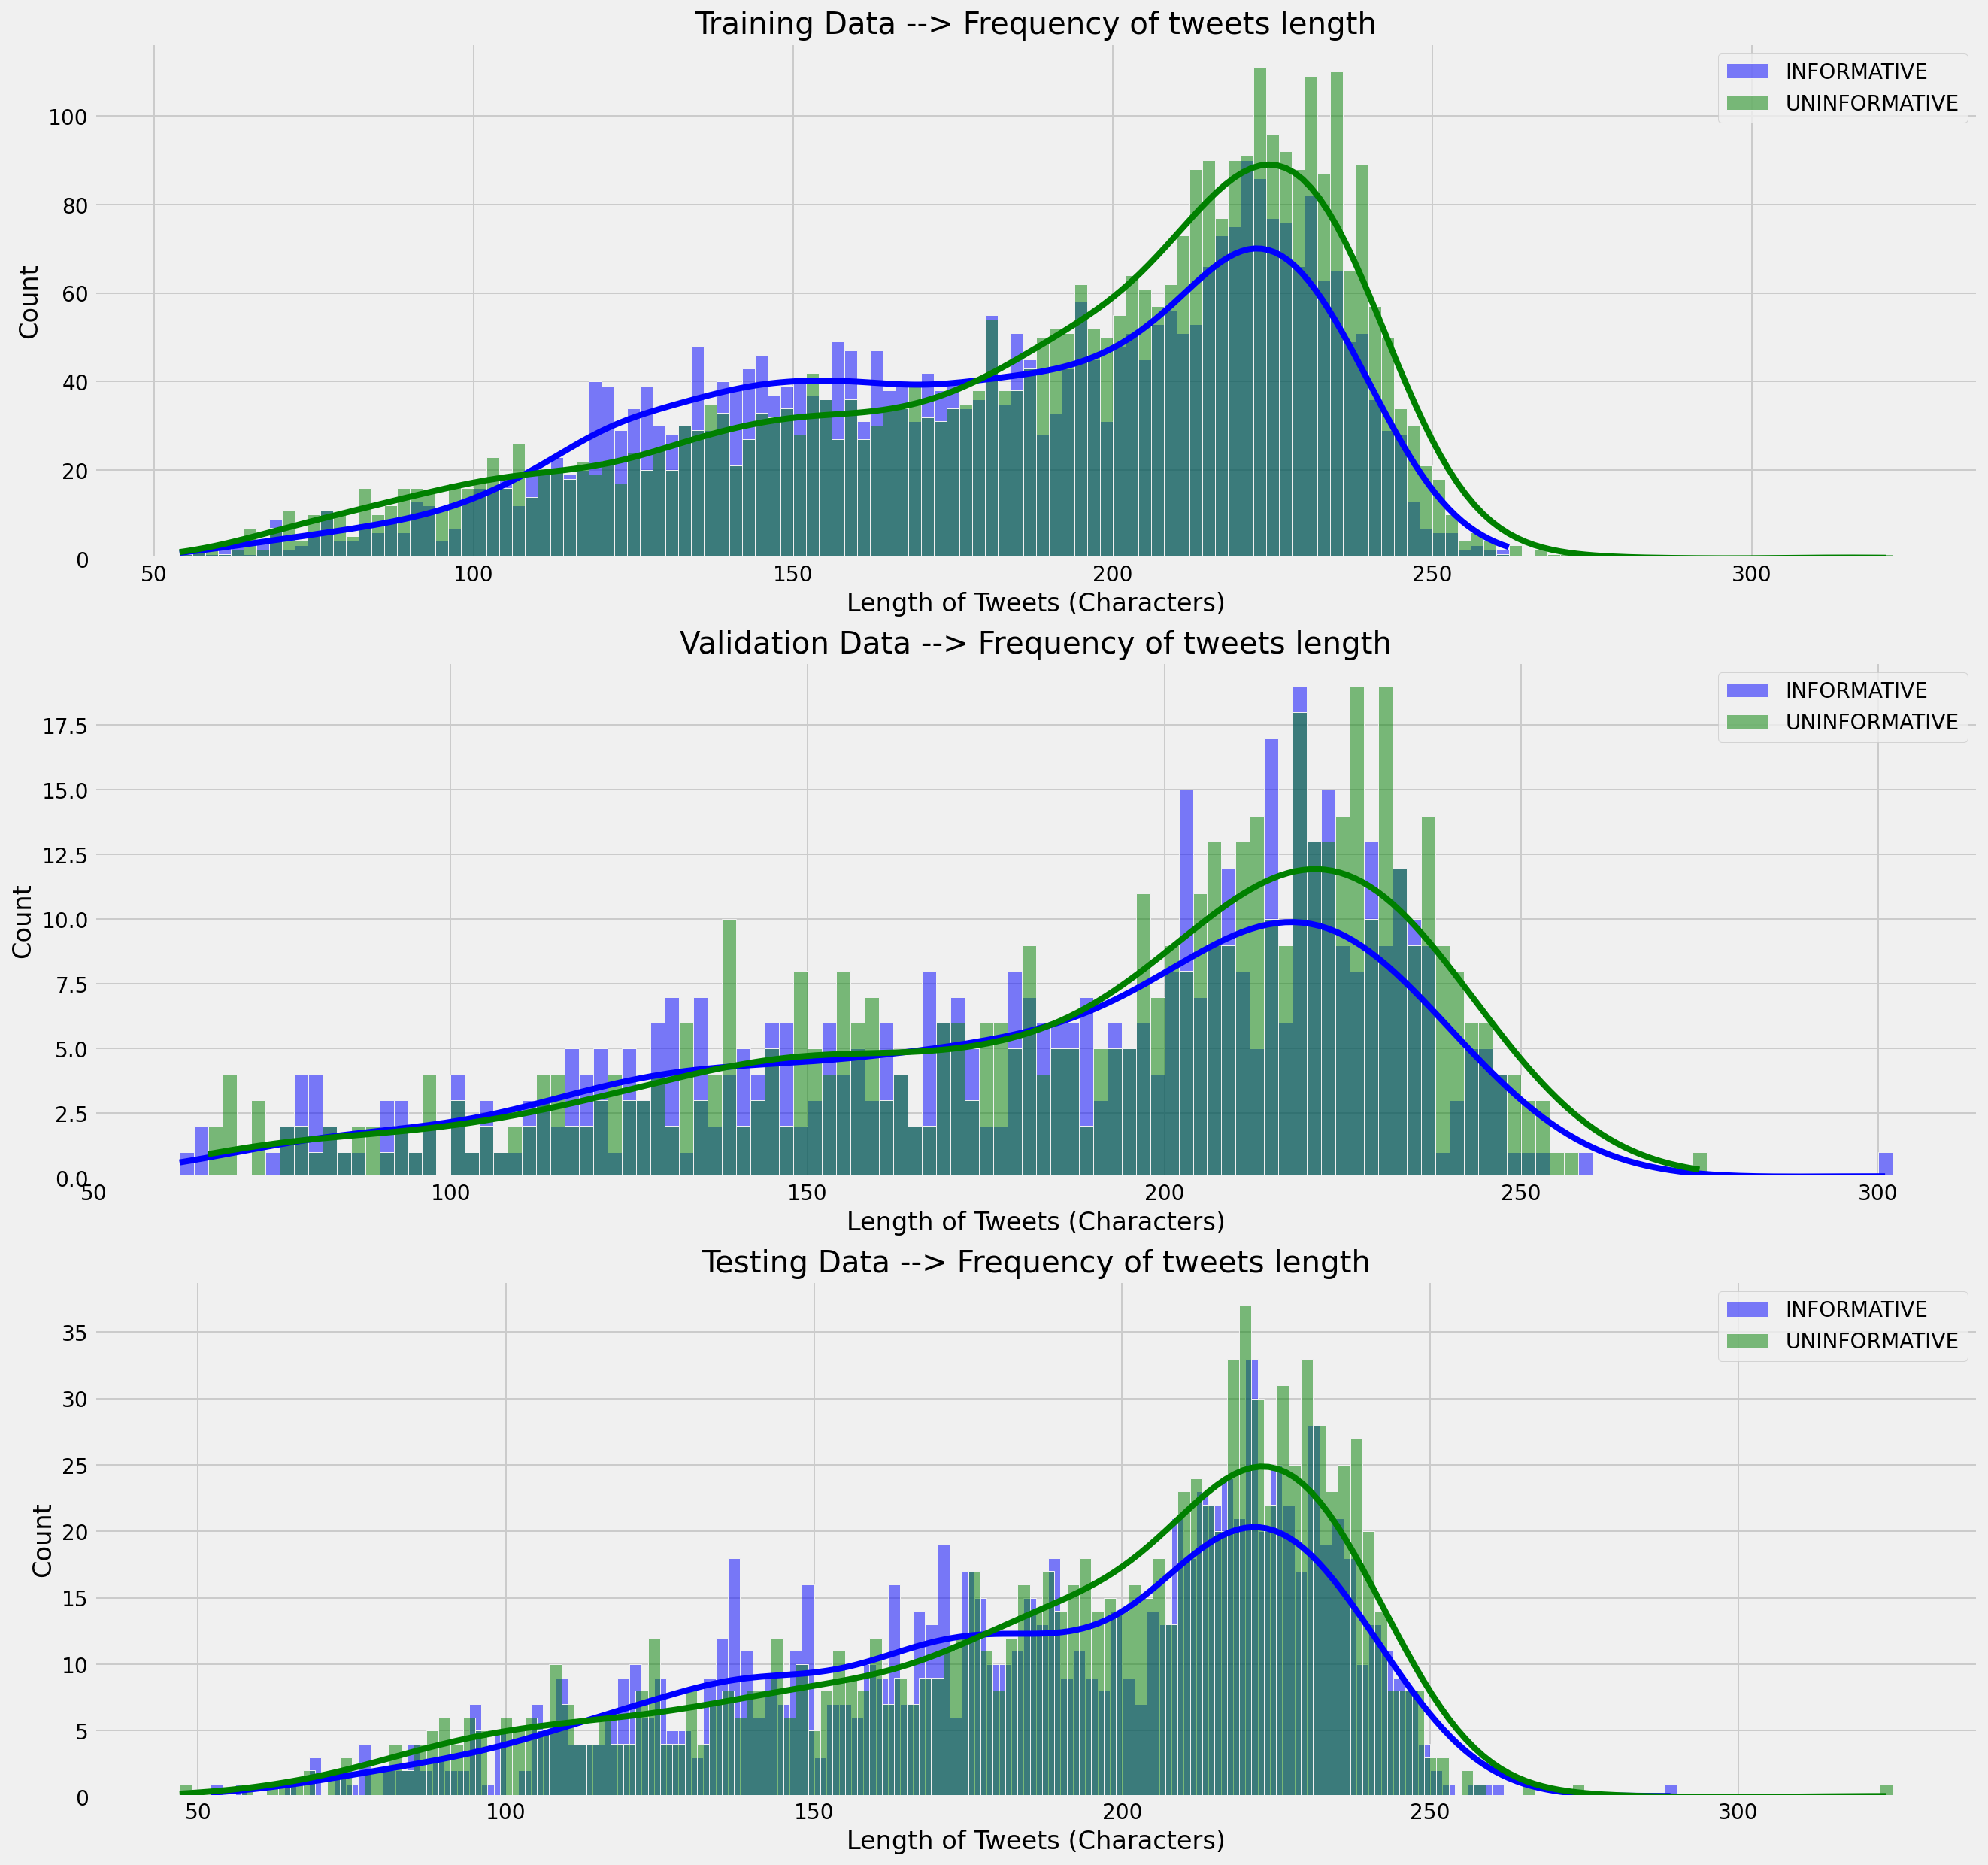

In [13]:
# Plot the frequency of tweets length
bins = 'auto'
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.histplot(train_data['Text_length'][train_data['Label'] == 1], label= 'INFORMATIVE', bins=bins, binwidth=2,  color='blue',alpha=0.5, kde=True)#
sns.histplot(train_data['Text_length'][train_data['Label'] == 0], label= 'UNINFORMATIVE', bins=bins, binwidth=2,color='green',alpha=0.5, kde=True)#
plt.xlabel('Length of Tweets (Characters)')
plt.ylabel('Count')
plt.title('Training Data --> Frequency of tweets length')
plt.legend(loc='best')

plt.subplot(3,1,2)
sns.histplot(valid_data['Text_length'][valid_data['Label'] == 1], label= 'INFORMATIVE', bins=bins,  binwidth=2,color='blue', alpha=0.5, kde=True)#
sns.histplot(valid_data['Text_length'][valid_data['Label'] == 0], label= 'UNINFORMATIVE', bins=bins, binwidth=2,color='green',alpha=0.5, kde=True)#
plt.xlabel('Length of Tweets (Characters)')
plt.ylabel('Count')
plt.title('Validation Data --> Frequency of tweets length')
plt.legend(loc='best')

plt.subplot(3,1,3)
sns.histplot(test_data['Text_length'][test_data['Label'] == 1], label= 'INFORMATIVE', bins=bins,  binwidth=2,color='blue', alpha=0.5, kde=True)#
sns.histplot(test_data['Text_length'][test_data['Label'] == 0], label= 'UNINFORMATIVE',bins=bins,binwidth=2,color='green',alpha=0.5, kde=True)#
plt.xlabel('Length of Tweets (Characters)')
plt.ylabel('Count')
plt.title('Testing Data --> Frequency of tweets length')
plt.legend(loc='best')

plt.show()

## Pre-processing the Dataset

We will use **NLTK** and **Regular Expression** to perform the pre-processing of the dataset

Example tweets:

真把公主不当干部 BREAKING: 21 people on Grand Princess cruise ship docked off the California coast tested positive for coronavirus, including 19 crew members and two passengers, Vice Pres. Mike Pence says. 24 people tested negative. HTTPURL HTTPURL	| INFORMATIVE

إِنَّا لِلّهِ وَإِنَّـا إِلَيْهِ رَاجِعُونَ Sad to hear about passing away of Syed Mehdi Shah Brother in law of CM Sindh @USER He was tested positive with #Covid_19 May Allah rest his soul in peace. | INFORMATIVE

@USER Carma &amp; her family in San Jose, CA, are possibly infected with #coronavirus since 6 Feb in Seattle. Way way more than 1,000 cases in Seattle now... HTTPURL |	INFORMATIVE


In [14]:
testTweet="RT @USER RT @USER I can't # Covid-19 12 p.m. 真把公主不当干部 BREAKING: 21 people on Grand Princess cruise ship docked off the California coast tested positive for coronavirus, including 19,000 crew members and two passengers, Vice Pres. Mike Pence says. 24 people tested negative. ? HTTPURL HTTPURL Address of this kernel: إِنَّا لِلّهِ وَإِنَّـا إِلَيْهِ رَاجِعُونَ Sad to hear about passing away of Syed Mehdi Shah Brother in law of CM Sindh @USER He was tested positive with #Covid_19 May Allah rest his soul in peace. "

In [15]:

unwanted_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                    "]+", re.UNICODE)

#credit from:https://datasciencetoday.net/index.php/en-us/tutorials-top/163-sentiment-analysis-using-python-part-i-machine-learning-model-comparison
negations_ = {"isn't":"is not", "can't":"can not","couldn't":"could not", "hasn't":"has not",
                "hadn't":"had not","won't":"will not",
                "wouldn't":"would not","aren't":"are not",
                "haven't":"have not", "doesn't":"does not","didn't":"did not",
                 "don't":"do not","shouldn't":"should not","wasn't":"was not", "weren't":"were not",
                "mightn't":"might not",
                "mustn't":"must not"}

negation_pattern = re.compile(r'\b(' + '|'.join(negations_.keys()) + r')\b')

bad_symbols = re.compile('[^0-9A-Za-z ]')

# Define a function to remove punctuations
def remove_punctuation(tweet):
    table=str.maketrans('','',string.punctuation)
    return tweet.translate(table)

In [16]:
def preprocessing_raw_tweets(tweet):

    # Unify all coronavirus terms
    #covid_19,#covid_2019,#covid19,#covid2019,#covid-2019, #Coronavid19,#SARS-CoV-2,#covid-19
    #Covid_19,#COVID19,#covid19 #coronavirus #CoronaOutbreak #CoronaVirusUpdate #Coronavirus #COVID-19

    tweet = re.sub('(?i)covid', 'coronavirus', tweet)
    tweet = re.sub('(?i)covid19', 'coronavirus', tweet)
    tweet = re.sub('(?i)covid-19', 'coronavirus', tweet)
    tweet = re.sub('(?i)covid_19', 'coronavirus', tweet)
    tweet = re.sub('(?i)covidー19', 'coronavirus', tweet)

    tweet = re.sub('(?i)covid2019', 'coronavirus', tweet)
    tweet = re.sub('(?i)covid-2019', 'coronavirus', tweet)
    tweet = re.sub('(?i)covid_2019', 'coronavirus', tweet)
    tweet = re.sub('(?i)covidー2019', 'coronavirus', tweet)

    tweet = re.sub('(?i)coronavirus', 'coronavirus', tweet)
    tweet = re.sub('(?i)coronavirus19', 'coronavirus', tweet)
    tweet = re.sub('(?i)coronavirus-19', 'coronavirus', tweet)
    tweet = re.sub('(?i)coronavirus_19', 'coronavirus', tweet)
    tweet = re.sub('(?i)coronavirusー19', 'coronavirus', tweet)

    tweet = re.sub('(?i)coronavirus', 'coronavirus', tweet)
    tweet = re.sub('(?i)coronavirus2019', 'coronavirus', tweet)
    tweet = re.sub('(?i)coronavirus-2019', 'coronavirus', tweet)
    tweet = re.sub('(?i)coronavirus_2019', 'coronavirus', tweet)
    tweet = re.sub('(?i)coronavirusー2019', 'coronavirus', tweet)

    tweet = re.sub('(?i)SARS-CoV-2', 'coronavirus', tweet)
    tweet = re.sub('(?i)Coronavid19', 'coronavirus', tweet)
    tweet = re.sub('(?i)coronaviru$', 'coronavirus', tweet)

    tweet = re.sub('^RT[\s]+', '', tweet) # Remove retweets symbols
    tweet = re.sub('@USER','',tweet) # Remove @USER
    tweet = re.sub('&amp', '', tweet) # Remove &amp
    tweet = re.sub('https?:\/\/.*[\r\n]*','',tweet) # Remove urls
    tweet = re.sub('HTTPURL', '', tweet)# Remove HTTPURL
    tweet = re.sub("\.{3}", '', tweet)

    tweet = re.sub('# ','#',tweet)
    tweet = re.sub(unwanted_pattern, '', tweet)# remove unwanted pattern
    tweet = negation_pattern.sub(lambda x: negations_[x.group()],tweet)
    tweet = bad_symbols.sub('', tweet)
    tweet = remove_punctuation(tweet)

    return tweet
testTweet = preprocessing_raw_tweets(testTweet)
print(testTweet)

 RT  I can not coronavirus 12 pm  BREAKING 21 people on Grand Princess cruise ship docked off the California coast tested positive for coronavirus including 19000 crew members and two passengers Vice Pres Mike Pence says 24 people tested negative    Address of this kernel      Sad to hear about passing away of Syed Mehdi Shah Brother in law of CM Sindh  He was tested positive with coronavirus May Allah rest his soul in peace 


In [17]:
import nltk
# download the stopwords from NLTK
nltk.download('stopwords')

from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from nltk.stem.snowball import SnowballStemmer     # module for stemming strings
from nltk.corpus import stopwords

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
snowball_stemmer = SnowballStemmer(language='english')
stopwords_english = stopwords.words('english')

def lower_and_stem(tweet):
    tweet = tweet.lower()
    tokens = re.split('\W+', tweet)
    tweet = " ".join([snowball_stemmer.stem(word) for word in tokens if word not in stopwords_english])
    return tweet

print(lower_and_stem(testTweet))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
 rt coronavirus 12 pm break 21 peopl grand princess cruis ship dock california coast test posit coronavirus includ 19000 crew member two passeng vice pres mike penc say 24 peopl test negat address kernel sad hear pass away sy mehdi shah brother law cm sindh test posit coronavirus may allah rest soul peac 


In [18]:
#Training Data
train_data['Text_pre_processed'] = train_data['Text'].apply(lambda x: preprocessing_raw_tweets(x))
train_data['Text_pre_processed_uncased'] = train_data['Text'].apply(lambda x: preprocessing_raw_tweets(x).lower())
train_data['Text_cleaned_uncased'] = train_data['Text_pre_processed'].apply(lambda x: lower_and_stem(x))
train_data['Text_cleaned_uncased_length'] = train_data['Text_cleaned_uncased'].apply(lambda x: len(x) - x.count(" "))
train_data['Text_cleaned_uncased_tokens'] = train_data['Text_cleaned_uncased'].apply(lambda x: tweet_tokenizer.tokenize(x))

train_data['Text_cleaned_uncased_tokens_length'] = train_data['Text_cleaned_uncased_tokens'].apply(lambda x: len(x))

train_data.head()

Label  ... Text_cleaned_uncased_tokens_length
0      1  ...                                 28
1      1  ...                                 24
2      1  ...                                 32
3      1  ...                                 28
4      0  ...                                 23

[5 rows x 9 columns]

In [19]:
#Validtion Data
valid_data['Text_pre_processed'] = valid_data['Text'].apply(lambda x: preprocessing_raw_tweets(x))
valid_data['Text_pre_processed_uncased'] = valid_data['Text'].apply(lambda x: preprocessing_raw_tweets(x).lower())
valid_data['Text_cleaned_uncased'] = valid_data['Text_pre_processed'].apply(lambda x: lower_and_stem(x))
valid_data['Text_cleaned_uncased_length'] = valid_data['Text_cleaned_uncased'].apply(lambda x: len(x) - x.count(" "))
valid_data['Text_cleaned_uncased_tokens'] = valid_data['Text_cleaned_uncased'].apply(lambda x: tweet_tokenizer.tokenize(x))
valid_data['Text_cleaned_uncased_tokens_length'] = valid_data['Text_cleaned_uncased_tokens'].apply(lambda x: len(x))

valid_data.head()

Label  ... Text_cleaned_uncased_tokens_length
0      0  ...                                 28
1      1  ...                                 22
2      0  ...                                 24
3      0  ...                                 21
4      0  ...                                 21

[5 rows x 9 columns]

In [20]:
#Test Data
test_data['Text_pre_processed'] = test_data['Text'].apply(lambda x: preprocessing_raw_tweets(x))
test_data['Text_pre_processed_uncased'] = test_data['Text'].apply(lambda x: preprocessing_raw_tweets(x).lower())
test_data['Text_cleaned_uncased'] = test_data['Text_pre_processed'].apply(lambda x: lower_and_stem(x))
test_data['Text_cleaned_uncased_length'] = test_data['Text_cleaned_uncased'].apply(lambda x: len(x) - x.count(" "))
test_data['Text_cleaned_uncased_tokens'] = test_data['Text_cleaned_uncased'].apply(lambda x: tweet_tokenizer.tokenize(x))
test_data['Text_cleaned_uncased_tokens_length'] = test_data['Text_cleaned_uncased_tokens'].apply(lambda x: len(x))

test_data.head()

Label  ... Text_cleaned_uncased_tokens_length
0      0  ...                                 26
1      1  ...                                 11
2      0  ...                                 19
3      0  ...                                 24
4      0  ...                                 18

[5 rows x 9 columns]

In [21]:
#unlabeled Data
unlabeled_test_with_noise['Text_pre_processed'] = unlabeled_test_with_noise['Text'].apply(lambda x: preprocessing_raw_tweets(x))
unlabeled_test_with_noise['Text_pre_processed_uncased'] = unlabeled_test_with_noise['Text'].apply(lambda x: preprocessing_raw_tweets(x).lower())
unlabeled_test_with_noise['Text_cleaned_uncased'] = unlabeled_test_with_noise['Text_pre_processed'].apply(lambda x: lower_and_stem(x))
unlabeled_test_with_noise['Text_cleaned_uncased_length'] = unlabeled_test_with_noise['Text_cleaned_uncased'].apply(lambda x: len(x) - x.count(" "))
unlabeled_test_with_noise['Text_cleaned_uncased_tokens'] = unlabeled_test_with_noise['Text_cleaned_uncased'].apply(lambda x: tweet_tokenizer.tokenize(x))
unlabeled_test_with_noise['Text_cleaned_uncased_tokens_length'] = unlabeled_test_with_noise['Text_cleaned_uncased_tokens'].apply(lambda x: len(x))

unlabeled_test_with_noise.head()

Text  ...  Text_cleaned_uncased_tokens_length
0  Fox Business' Lou Dobbs Self-Quarantines After...  ...                                   9
1  Results from UVRI showed the sample is positiv...  ...                                  27
2  Today or tomorrow, the number of #COVIDー19 cas...  ...                                  20
3  Ramsey County veterans experiencing negative f...  ...                                  17
4  The #Covid19 death rate in New Orleans is 7x h...  ...                                  24

[5 rows x 8 columns]

In [ ]:
all_data_preprocessed = pd.concat([train_data,valid_data,test_data], axis=0)
all_data_preprocessed

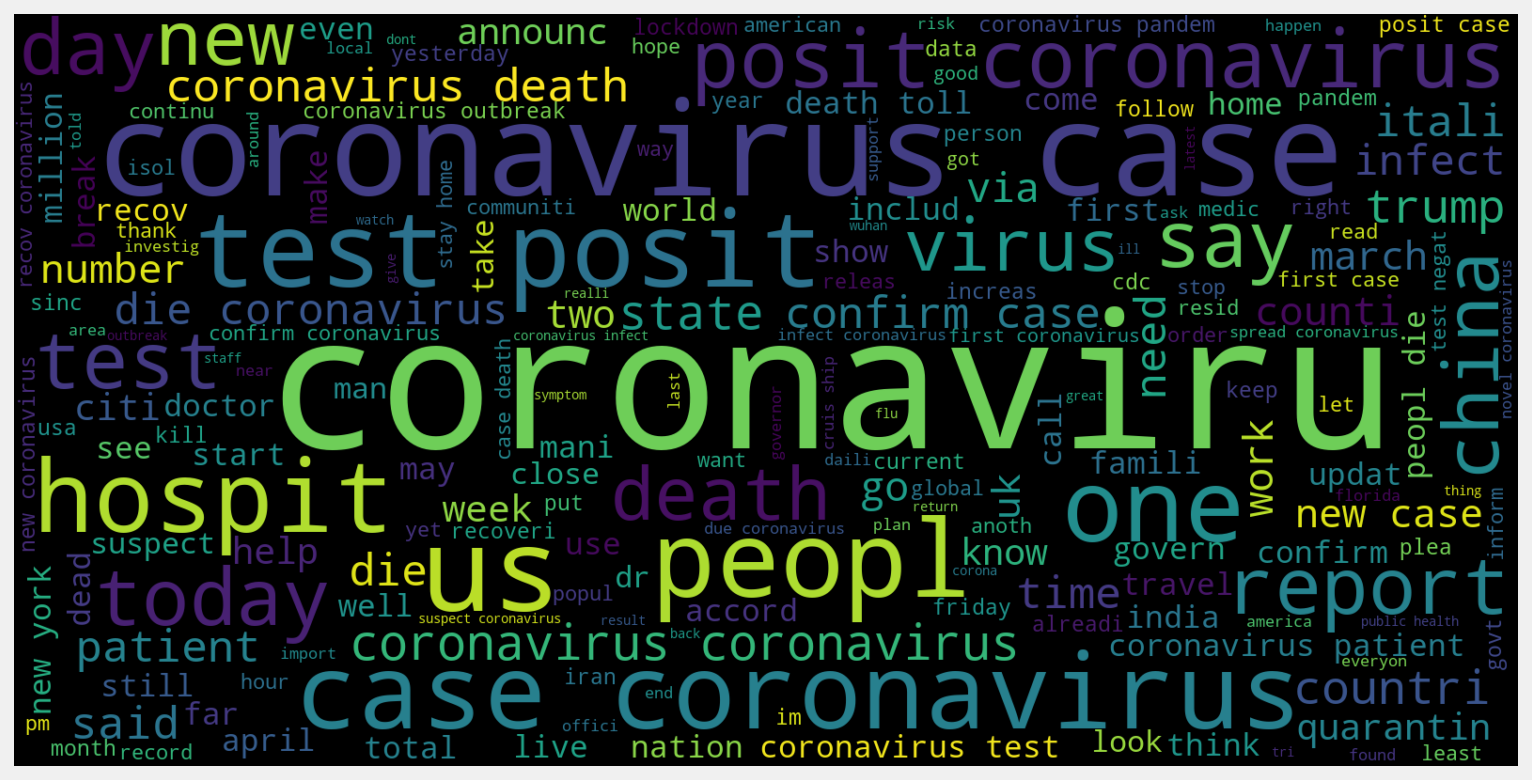

In [36]:
plt.style.use('fivethirtyeight')
cleaned_text = all_data_preprocessed['Text_cleaned_uncased']
cleaned_string = []
for t in cleaned_text.values:
    cleaned_string.append(t)
clean_string = pd.Series(cleaned_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(clean_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

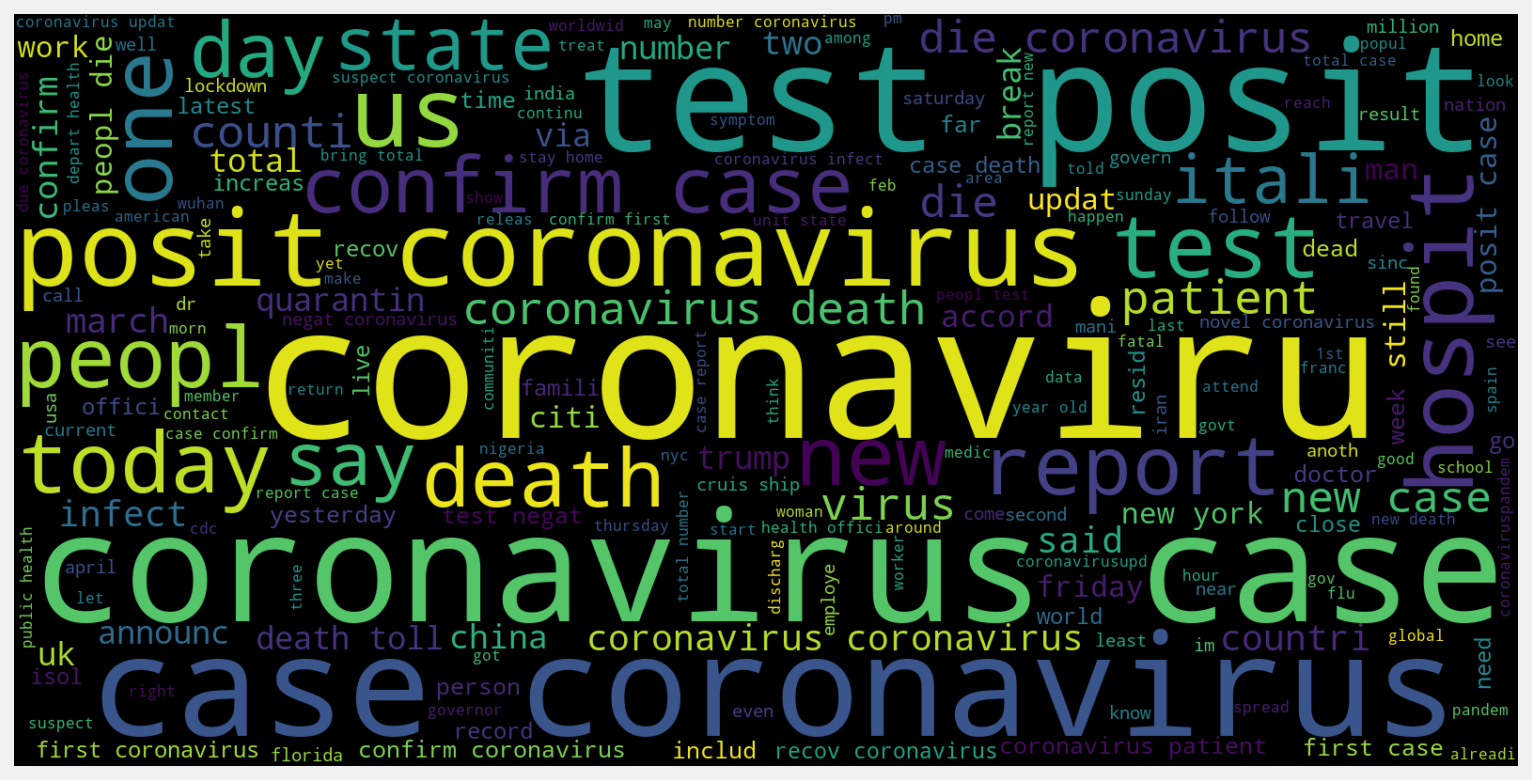

In [37]:
# informative words wordcloud
informative_text = all_data_preprocessed[all_data_preprocessed.Label == 1]
informative_string = []
for t in informative_text.Text_cleaned_uncased:
    informative_string.append(t)
informative_string = pd.Series(informative_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800, random_state=100, max_font_size=200).generate(informative_string)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

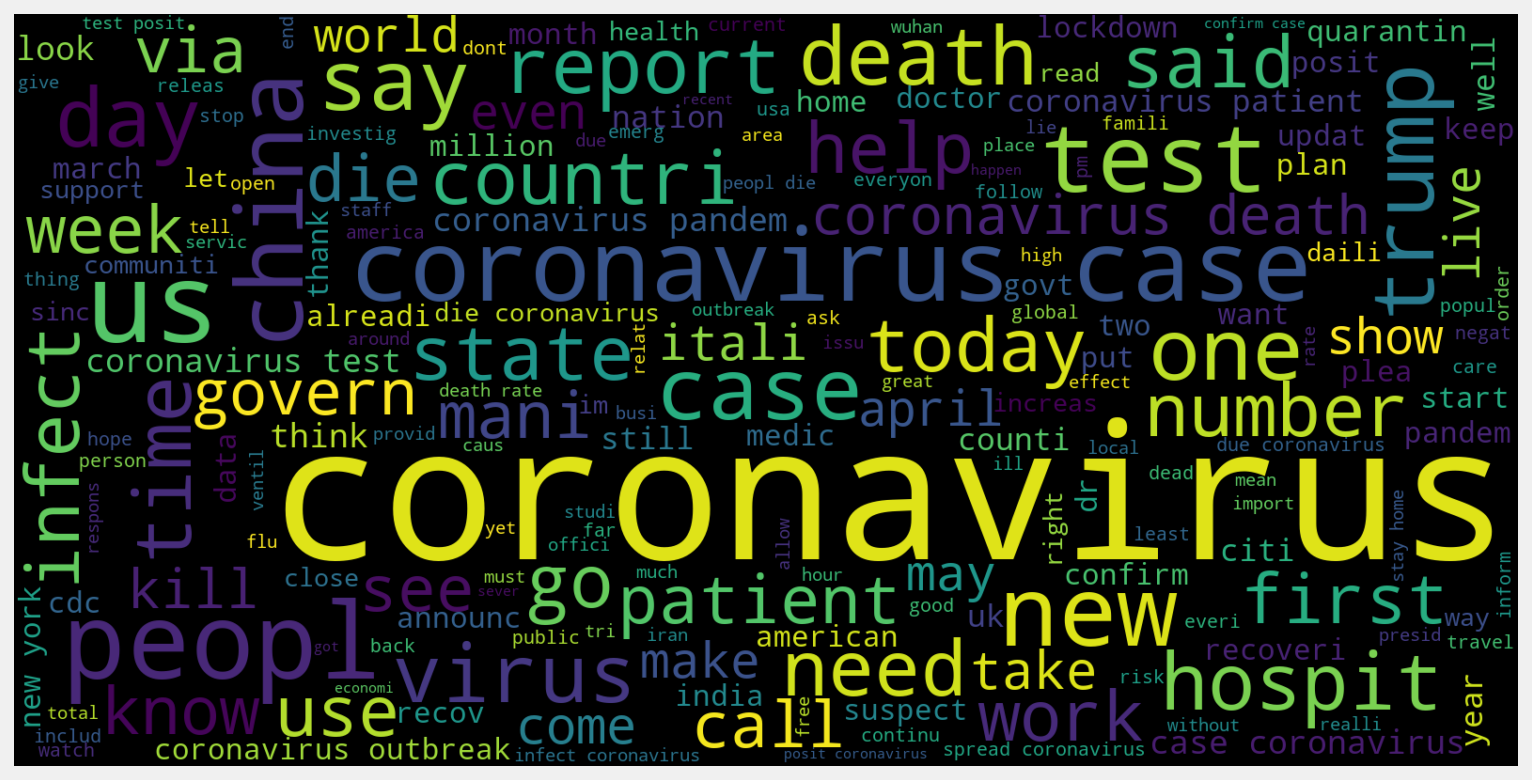

In [38]:
# uninformative words wordcloud
uninformative_text = all_data_preprocessed[all_data_preprocessed.Label == 0]
uninformative_string = []
for t in uninformative_text.Text_cleaned_uncased:
    uninformative_string.append(t)
uninformative_string = pd.Series(uninformative_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800, random_state=100, max_font_size=200).generate(uninformative_string)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

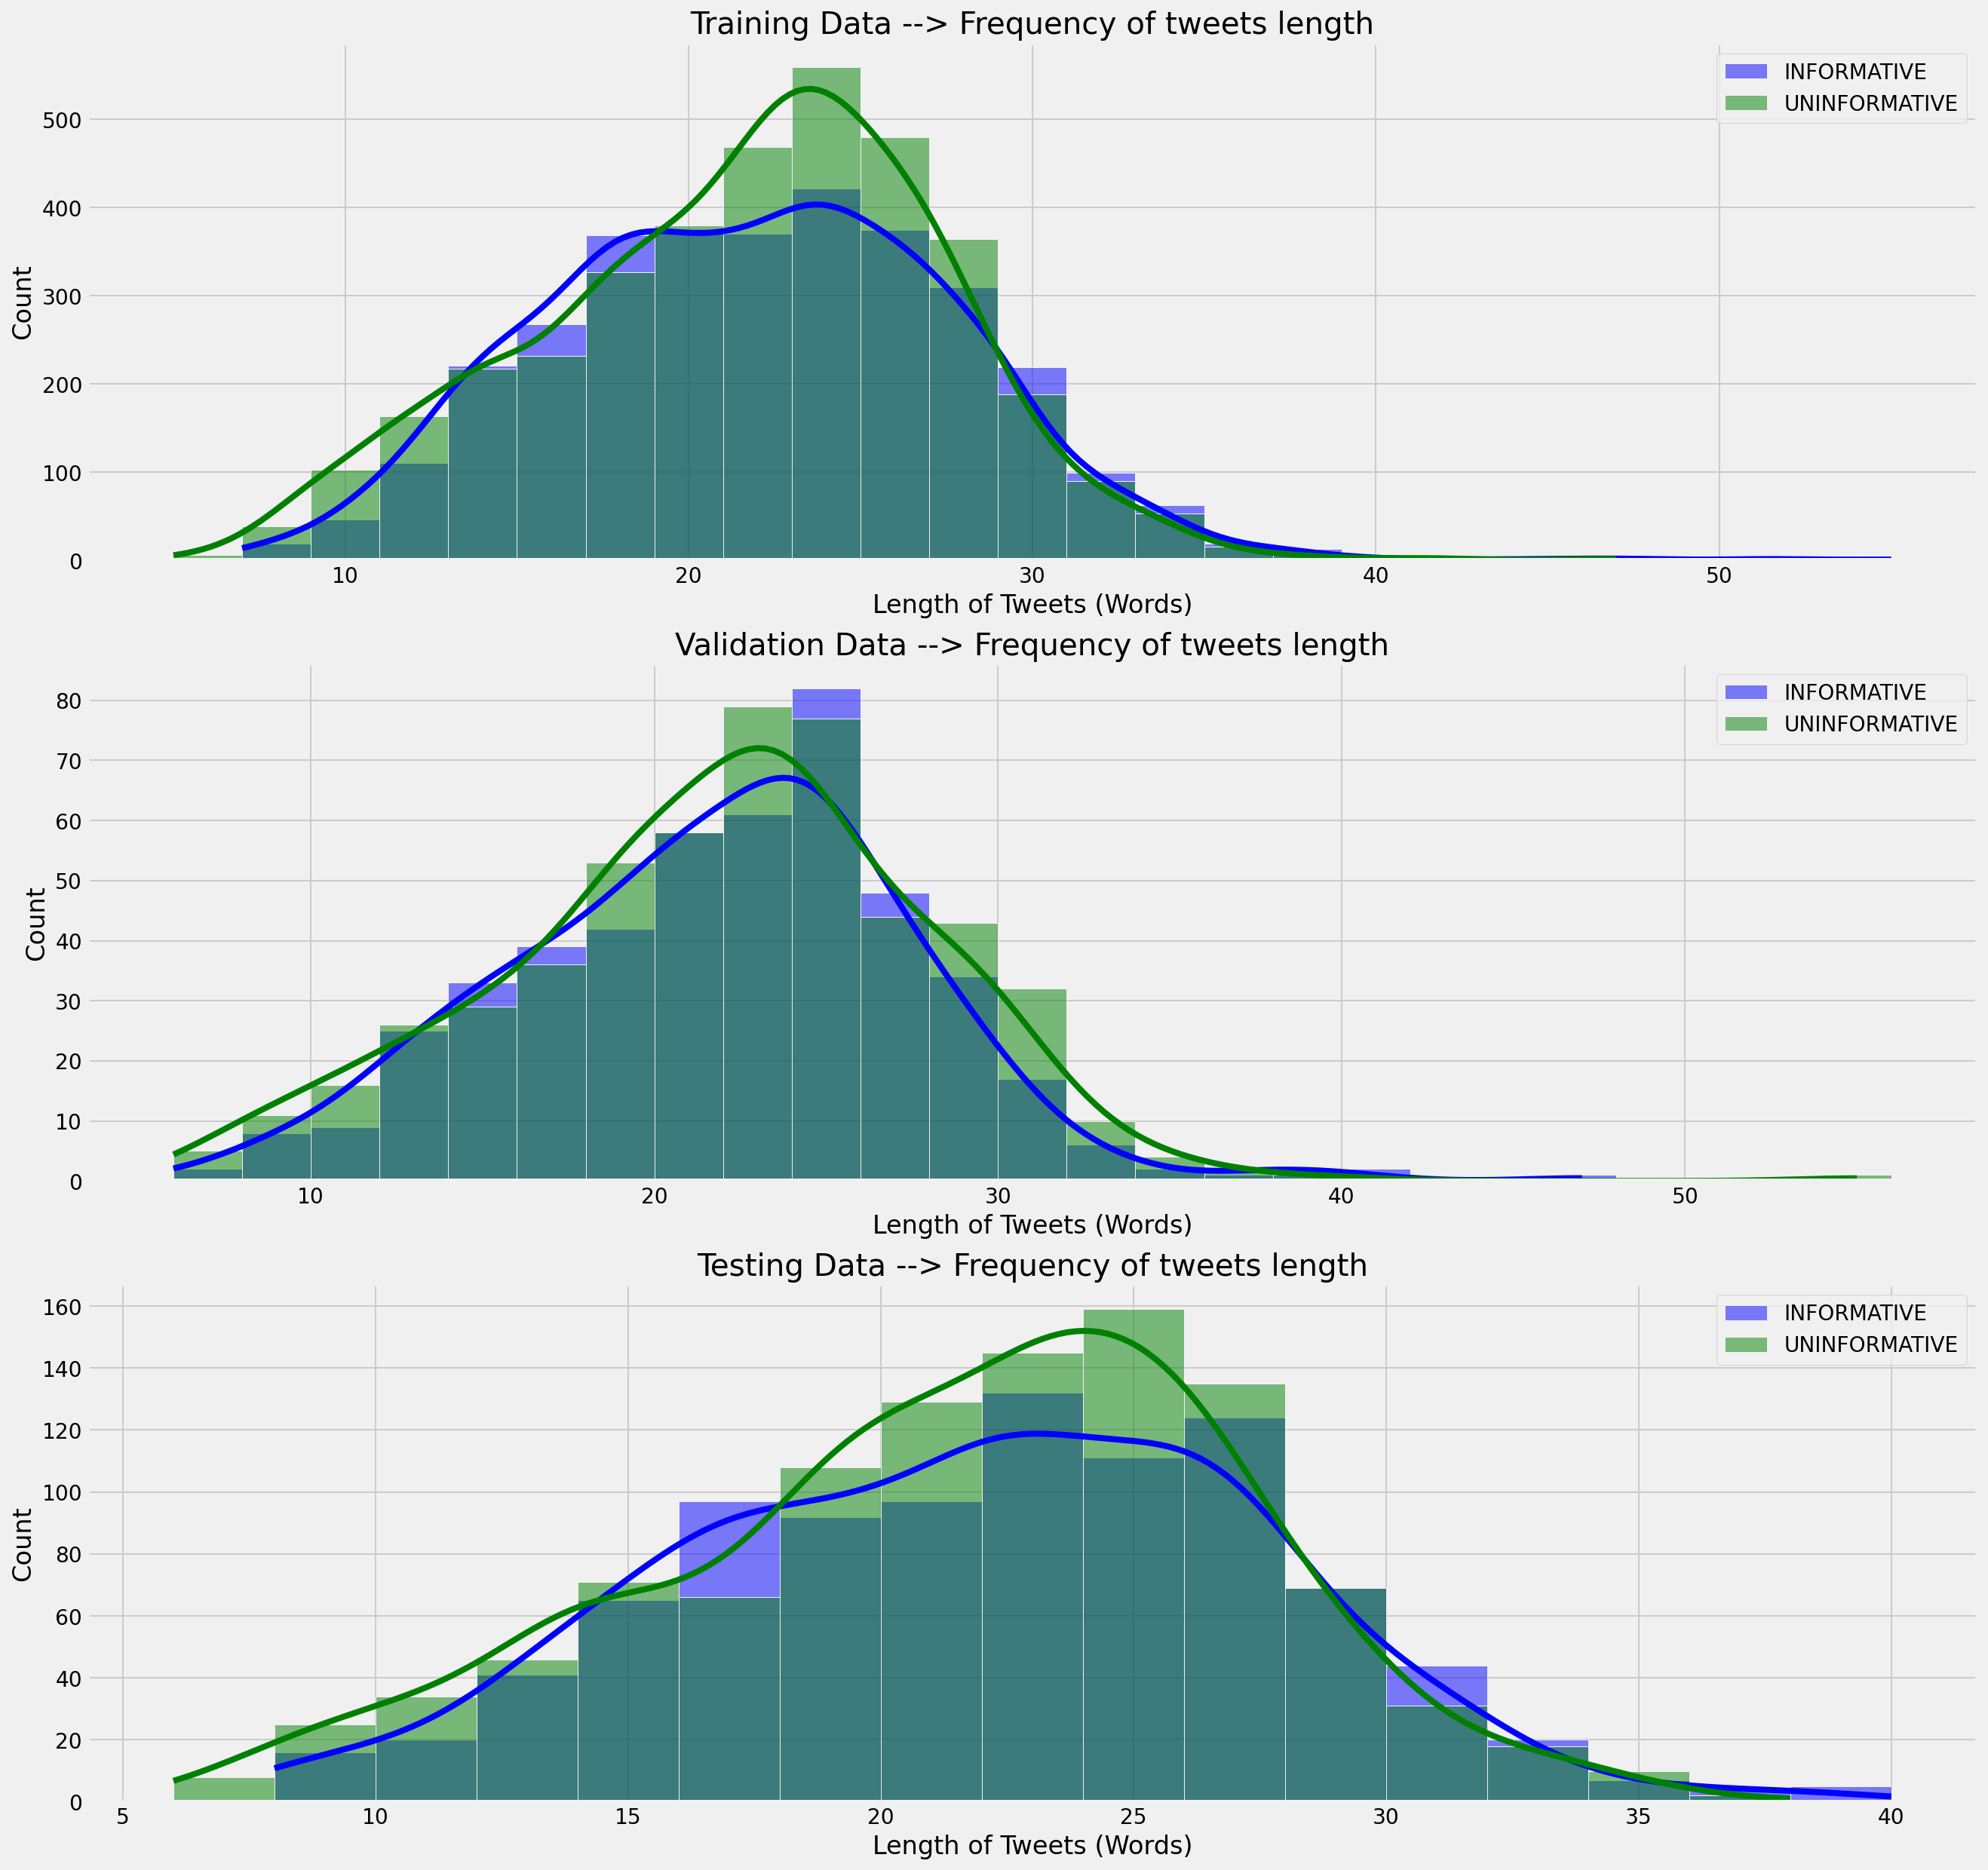

In [ ]:
# Plot the frequency of tweets length
bins = 'auto'
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.histplot(train_data['Text_cleaned_uncased_tokens_length'][train_data['Label'] == 1], label= 'INFORMATIVE', bins=bins, binwidth=2,  color='blue',alpha=0.5, kde=True)#
sns.histplot(train_data['Text_cleaned_uncased_tokens_length'][train_data['Label'] == 0], label= 'UNINFORMATIVE', bins=bins, binwidth=2,color='green',alpha=0.5, kde=True)#
plt.xlabel('Length of Tweets (Words)')
plt.ylabel('Count')
plt.title('Training Data --> Frequency of tweets length')
plt.legend(loc='best')

plt.subplot(3,1,2)
sns.histplot(valid_data['Text_cleaned_uncased_tokens_length'][valid_data['Label'] == 1], label= 'INFORMATIVE', bins=bins,  binwidth=2,color='blue', alpha=0.5, kde=True)#
sns.histplot(valid_data['Text_cleaned_uncased_tokens_length'][valid_data['Label'] == 0], label= 'UNINFORMATIVE', bins=bins, binwidth=2,color='green',alpha=0.5, kde=True)#
plt.xlabel('Length of Tweets (Words)')
plt.ylabel('Count')
plt.title('Validation Data --> Frequency of tweets length')
plt.legend(loc='best')

plt.subplot(3,1,3)
sns.histplot(test_data['Text_cleaned_uncased_tokens_length'][test_data['Label'] == 1], label= 'INFORMATIVE', bins=bins,  binwidth=2,color='blue', alpha=0.5, kde=True)#
sns.histplot(test_data['Text_cleaned_uncased_tokens_length'][test_data['Label'] == 0], label= 'UNINFORMATIVE',bins=bins,binwidth=2,color='green',alpha=0.5, kde=True)#
plt.xlabel('Length of Tweets (Words)')
plt.ylabel('Count')
plt.title('Testing Data --> Frequency of tweets length')
plt.legend(loc='best')

plt.show()

In [ ]:
train_data.to_csv('./Dataset_preprocessed/train_preprocessed.tsv', sep='\t', index=False,header=True)
valid_data.to_csv('./Dataset_preprocessed/valid_preprocessed.tsv', sep='\t', index=False,header=True)
test_data.to_csv('./Dataset_preprocessed/test_preprocessed.tsv', sep='\t', index=False,header=True)
unlabeled_test_with_noise.to_csv('./Dataset_preprocessed/unlabeled_test_with_noise_preprocessed.tsv', sep='\t', index=False,header=True)